In [1]:
import numpy as np
import pandas as pd
import pathlib as pl
from datetime import datetime,time,date
import psycopg2

import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (12.0, 4.0)

In [2]:
datapath = pl.Path("/home/techstar/data/pyprojects/metro_cq")

In [36]:
datapath.joinpath("sr_wkd.csv")

PosixPath('/home/techstar/data/pyprojects/metro_cq/sr_wkd.csv')

In [4]:
con= psycopg2.connect(database="metro",user="gpadmin",password="gpadmin",host="192.168.0.93",port="5432")

In [13]:
df = pd.read_sql("select t.date, ot.t30, t.sta, count(1)\
    from od_raw t\
    join olap_time ot on date_trunc('minute', t.time) = ot.t1\
    where od = 21 and date = '2016-12-01' and t.sta = 114\
    group by t.date, ot.t30, t.sta\
    order by t.date, ot.t30, t.sta;", con=con)

#con.close()

In [5]:
df = pd.read_sql("select t.date, ot.t30, count(1)\
    from od_raw t\
    join olap_time ot on date_trunc('minute', t.time) = ot.t1\
    where od = 21 \
    group by t.date, ot.t30\
    order by t.date, ot.t30;", con=con)
df
con.close()

In [6]:
df_new = df.copy()
t ="t30"
df_new["datetime"]=pd.to_datetime(df.date.apply(lambda x: datetime.strftime(x,"%Y-%m-%d"))+" "+ df[t])
df_new['time']=df[t].apply(lambda x: pd.to_datetime(x).time())

df_new= df_new.drop(columns=[t]).set_index("datetime")
#df_new= df_new.set_index("time")
#df_log = np.log(df_new)

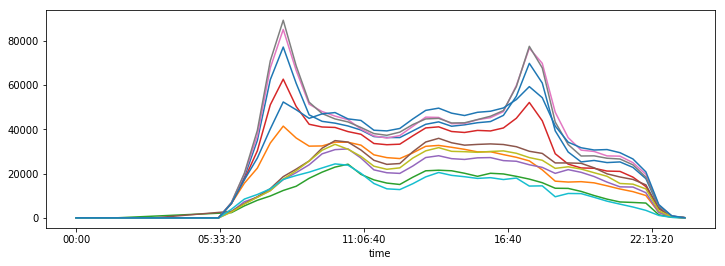

In [7]:
pylab.rcParams['figure.figsize'] = (12.0, 4.0)
for date in set(df_new["2017-1-21":].date.apply(lambda x: datetime.strftime(x,"%Y-%m-%d"))):
    plt.plot(df_new[date].set_index("time")['count'])
#df_new.set_index("t30").count

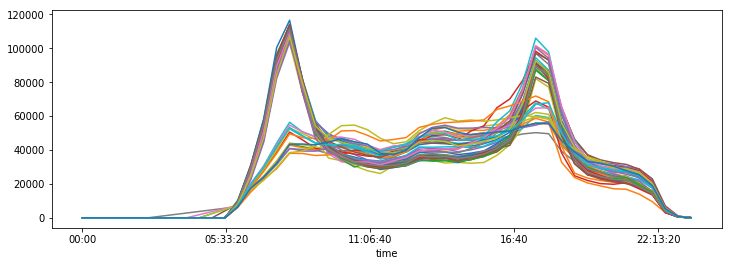

In [8]:
pylab.rcParams['figure.figsize'] = (12.0, 4.0)
for date in set(df_new[:"2017-1-20"].date.apply(lambda x: datetime.strftime(x,"%Y-%m-%d"))):
    plt.plot(df_new[date].set_index("time")['count'])
#df_new.set_index("t30").count

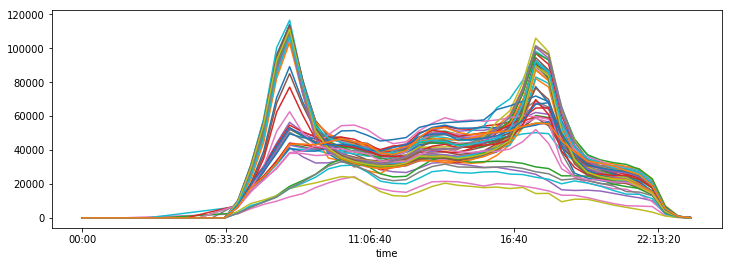

In [9]:
pylab.rcParams['figure.figsize'] = (12.0, 4.0)
for date in set(df_new.date.apply(lambda x: datetime.strftime(x,"%Y-%m-%d"))):
    plt.plot(df_new[date].set_index("time")['count'])
#df_new.set_index("t30").count

In [10]:
df_reshaped=df_new.pivot("date","time","count")
#df_reshaped = df_reshaped.dropna()

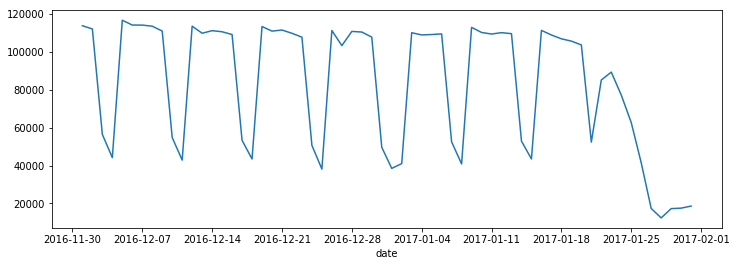

In [11]:
df_reshaped[time(8,0,0)].plot()

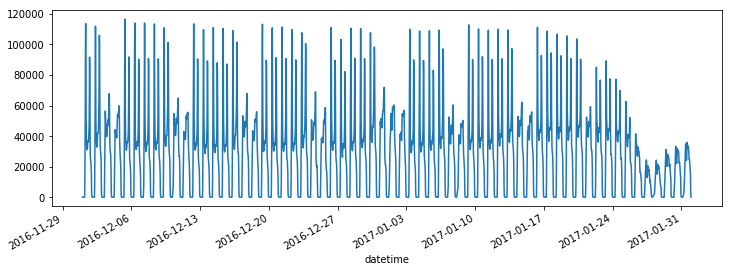

In [12]:
df_new['count'].plot()

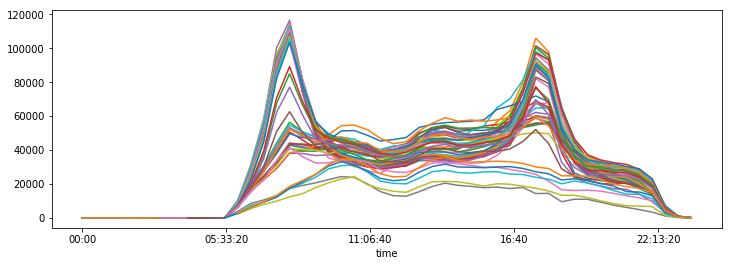

In [13]:
for i in range(len(df_reshaped)):
    plt.plot(df_reshaped.iloc[i])

In [14]:
df_reshaped =df_new[(df_new.time>time(5,30)) & (df_new.time<=time(23,30))].pivot("date","time","count")

In [29]:
df_weekday=df_new[(df_new.time>time(5,30)) & (df_new.time<=time(23,30))]
rg_wkd = pd.date_range(df_weekday.date[0],df_weekday.date[-1],freq="B")
for idx in df_weekday.index:
    if (idx.date() not in rg_wkd) | (idx.date() ==datetime(2017,1,2).date()):
        df_weekday = df_weekday.drop(index=[idx])
        

In [30]:
df_wkd_rsp = df_weekday[:"2017-1-20"].pivot("date","time","count")

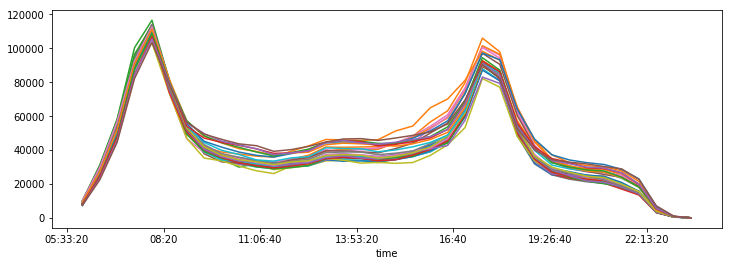

In [31]:
for i in range(len(df_wkd_rsp)):
    plt.plot(df_wkd_rsp.iloc[i])

In [37]:
sr_wkd = df_weekday[:"2017-1-20"].drop(columns=['date','time'])
sr_wkd.to_csv(datapath.joinpath("sr_wkd.csv"))

In [32]:
df_wkd_rsp

time,06:00:00,06:30:00,07:00:00,07:30:00,08:00:00,08:30:00,09:00:00,09:30:00,10:00:00,10:30:00,...,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
date,,,,,,,,,,,,,,,,,,,,,
2016-12-01,8329,27141,53755,95004,113641,81039,52777,41634,36360,33479,...,34179,26700,24312,23268,22564,18691,15073,3577,682,103
2016-12-02,7972,26193,51803,91202,111947,79036,51301,40490,36927,34892,...,45748,34303,30573,28574,28627,25598,19929,5202,866,103
2016-12-05,9877,31250,58384,100400,116536,81206,54016,42116,36705,34274,...,34752,25433,24099,22408,21368,17925,14304,3162,609,83
2016-12-06,7895,26903,53722,95472,113998,80524,51527,39614,36335,34222,...,35085,28061,24982,22641,20917,17826,14743,3395,662,91
2016-12-07,8278,26808,52804,93329,113976,78878,51712,40970,35222,32795,...,34060,26774,24862,24143,22377,18439,14858,3500,662,107
2016-12-08,8129,26650,53410,93156,113404,79944,52984,40834,36038,33519,...,35571,27649,25903,24123,23405,19655,15383,3865,666,95
2016-12-09,8397,27828,52163,90541,110841,78043,49699,40837,37149,35541,...,42752,33155,30100,27961,27007,25191,18333,4951,748,83
2016-12-12,9627,30685,56655,95140,113426,81436,53103,42071,36867,33981,...,31849,25421,22853,21350,20421,18074,14101,3489,616,96
2016-12-13,8133,26941,53058,91922,109687,79223,51730,40935,35487,32990,...,34097,26211,24463,22049,21309,17617,14200,3567,654,91


In [15]:
df_reshaped.dropna()

time,06:00:00,06:30:00,07:00:00,07:30:00,08:00:00,08:30:00,09:00:00,09:30:00,10:00:00,10:30:00,...,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
date,,,,,,,,,,,,,,,,,,,,,
2016-12-01,8329,27141,53755,95004,113641,81039,52777,41634,36360,33479,...,34179,26700,24312,23268,22564,18691,15073,3577,682,103
2016-12-02,7972,26193,51803,91202,111947,79036,51301,40490,36927,34892,...,45748,34303,30573,28574,28627,25598,19929,5202,866,103
2016-12-03,6890,20182,30687,44126,56386,50707,47796,47487,47372,44711,...,37381,31422,30481,28730,28643,24459,19144,4811,667,80
2016-12-04,6680,17803,24833,33642,44154,43142,41842,40510,42725,42619,...,37715,33023,29226,26531,24051,20835,15668,4022,598,97
2016-12-05,9877,31250,58384,100400,116536,81206,54016,42116,36705,34274,...,34752,25433,24099,22408,21368,17925,14304,3162,609,83
2016-12-06,7895,26903,53722,95472,113998,80524,51527,39614,36335,34222,...,35085,28061,24982,22641,20917,17826,14743,3395,662,91
2016-12-07,8278,26808,52804,93329,113976,78878,51712,40970,35222,32795,...,34060,26774,24862,24143,22377,18439,14858,3500,662,107
2016-12-08,8129,26650,53410,93156,113404,79944,52984,40834,36038,33519,...,35571,27649,25903,24123,23405,19655,15383,3865,666,95
2016-12-09,8397,27828,52163,90541,110841,78043,49699,40837,37149,35541,...,42752,33155,30100,27961,27007,25191,18333,4951,748,83


In [57]:
(df_new.index.tz_localize("Asia/Shanghai"))[0].value

1480521600000000000

In [58]:
(df_new.index.tz_localize("Asia/Shanghai")).values

array(['2016-11-30T16:00:00.000000000', '2016-11-30T16:30:00.000000000',
       '2016-11-30T17:00:00.000000000', ...,
       '2017-01-31T14:30:00.000000000', '2017-01-31T15:00:00.000000000',
       '2017-01-31T15:30:00.000000000'], dtype='datetime64[ns]')

In [60]:
(df_new.index.tz_localize("Asia/Shanghai"))

DatetimeIndex(['2016-12-01 00:00:00+08:00', '2016-12-01 00:30:00+08:00',
               '2016-12-01 01:00:00+08:00', '2016-12-01 01:30:00+08:00',
               '2016-12-01 02:00:00+08:00', '2016-12-01 02:30:00+08:00',
               '2016-12-01 04:30:00+08:00', '2016-12-01 05:00:00+08:00',
               '2016-12-01 05:30:00+08:00', '2016-12-01 06:00:00+08:00',
               ...
               '2017-01-31 19:00:00+08:00', '2017-01-31 19:30:00+08:00',
               '2017-01-31 20:00:00+08:00', '2017-01-31 20:30:00+08:00',
               '2017-01-31 21:00:00+08:00', '2017-01-31 21:30:00+08:00',
               '2017-01-31 22:00:00+08:00', '2017-01-31 22:30:00+08:00',
               '2017-01-31 23:00:00+08:00', '2017-01-31 23:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', name='datetime', length=2834, freq=None)

In [61]:
(df_new.index.tz_localize("Asia/Shanghai")).tz_convert('UTC')

DatetimeIndex(['2016-11-30 16:00:00+00:00', '2016-11-30 16:30:00+00:00',
               '2016-11-30 17:00:00+00:00', '2016-11-30 17:30:00+00:00',
               '2016-11-30 18:00:00+00:00', '2016-11-30 18:30:00+00:00',
               '2016-11-30 20:30:00+00:00', '2016-11-30 21:00:00+00:00',
               '2016-11-30 21:30:00+00:00', '2016-11-30 22:00:00+00:00',
               ...
               '2017-01-31 11:00:00+00:00', '2017-01-31 11:30:00+00:00',
               '2017-01-31 12:00:00+00:00', '2017-01-31 12:30:00+00:00',
               '2017-01-31 13:00:00+00:00', '2017-01-31 13:30:00+00:00',
               '2017-01-31 14:00:00+00:00', '2017-01-31 14:30:00+00:00',
               '2017-01-31 15:00:00+00:00', '2017-01-31 15:30:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=2834, freq=None)

In [55]:
df_new.index[0].value

1480550400000000000

In [59]:
df_new.index.values

array(['2016-12-01T00:00:00.000000000', '2016-12-01T00:30:00.000000000',
       '2016-12-01T01:00:00.000000000', ...,
       '2017-01-31T22:30:00.000000000', '2017-01-31T23:00:00.000000000',
       '2017-01-31T23:30:00.000000000'], dtype='datetime64[ns]')

In [62]:
df_new.index

DatetimeIndex(['2016-12-01 00:00:00', '2016-12-01 00:30:00',
               '2016-12-01 01:00:00', '2016-12-01 01:30:00',
               '2016-12-01 02:00:00', '2016-12-01 02:30:00',
               '2016-12-01 04:30:00', '2016-12-01 05:00:00',
               '2016-12-01 05:30:00', '2016-12-01 06:00:00',
               ...
               '2017-01-31 19:00:00', '2017-01-31 19:30:00',
               '2017-01-31 20:00:00', '2017-01-31 20:30:00',
               '2017-01-31 21:00:00', '2017-01-31 21:30:00',
               '2017-01-31 22:00:00', '2017-01-31 22:30:00',
               '2017-01-31 23:00:00', '2017-01-31 23:30:00'],
              dtype='datetime64[ns]', name='datetime', length=2834, freq=None)

In [64]:
df_new.index.tz_localize("UTC").tz_convert("Asia/Shanghai")

DatetimeIndex(['2016-12-01 08:00:00+08:00', '2016-12-01 08:30:00+08:00',
               '2016-12-01 09:00:00+08:00', '2016-12-01 09:30:00+08:00',
               '2016-12-01 10:00:00+08:00', '2016-12-01 10:30:00+08:00',
               '2016-12-01 12:30:00+08:00', '2016-12-01 13:00:00+08:00',
               '2016-12-01 13:30:00+08:00', '2016-12-01 14:00:00+08:00',
               ...
               '2017-02-01 03:00:00+08:00', '2017-02-01 03:30:00+08:00',
               '2017-02-01 04:00:00+08:00', '2017-02-01 04:30:00+08:00',
               '2017-02-01 05:00:00+08:00', '2017-02-01 05:30:00+08:00',
               '2017-02-01 06:00:00+08:00', '2017-02-01 06:30:00+08:00',
               '2017-02-01 07:00:00+08:00', '2017-02-01 07:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', name='datetime', length=2834, freq=None)

In [75]:
[(x in pd.date_range(df_reshaped.index[0],df_reshaped.index[-1],freq="B")) for x in df_reshaped.index]

[True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True]